# 1.Imports

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth',-1)

In [2]:
from time import time

In [3]:
import re

In [4]:
import string

In [5]:
import os

In [6]:
import emoji

In [7]:
from pprint import pprint

In [8]:
import collections

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
sns.set(style="darkgrid")

In [12]:
sns.set(font_scale=1.3)

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.pipeline import Pipeline,FeatureUnion

In [19]:
from sklearn.metrics import classification_report

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.externals import joblib

C:\Users\Jayaprada\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [23]:
pip install --upgrade gensim

Requirement already up-to-date: gensim in c:\users\jayaprada\anaconda3\lib\site-packages (4.1.2)
Note: you may need to restart the kernel to use updated packages.


In [24]:
from nltk.corpus import stopwords

In [25]:
import gensim

In [26]:
import warnings

In [27]:
warnings.filterwarnings('ignore')

In [28]:
np.random.seed(37)

# 2.Loading dataset

In [29]:
airlines_train=pd.read_csv('Tweets.csv')

In [30]:
airlines_train.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [31]:
#airlines_train=airlines_train.reindex(np.random.permutation(airlines_train.index))

In [32]:
airlines_train=airlines_train[['text','airline_sentiment']]

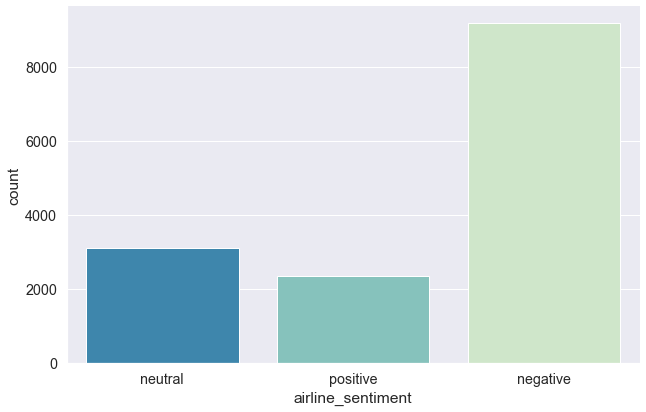

In [33]:
sns.factorplot(x="airline_sentiment",data=airlines_train,kind="count",size=6,aspect=1.5,palette="GnBu_r")
plt.show()

# 3.Cleaning text

In [34]:
class CleanText(BaseEstimator,TransformerMixin):
    def remove_mentions(self,input_text):
        return re.sub(r'@\w+', '' , input_text)
    def remove_urls(self,input_text):
        return re.sub(r'http.?//[^\s]+[\s]?','',input_text)
    def emoji_oneword(self,input_text):
        return input_text.replace('_','')
    def remove_punctuation(self,input_text):
        punct=string.punctuation
        trantab=str.maketrans(punct,len(punct)*' ')
        return input_text.translate(trantab)
    def remove_digits(self,input_text):
        return re.sub('\d+','',input_text)
    def to_lower(self,input_text):
        return input_text.lower()
    def remove_stopwords(self,input_text):
        stopwords_list=stopwords.words('english')
        whitelist=["n't","not","no"]
        words=input_text.split()
        clean_words=[word for word in words if (word not in stopword_list or word in whitelist) and len(word)>1]
        return " ".join(clean_words)
    def stemming(self,input_text):
        porter=PorterStemmer()
        words=input_text.split()
        stemmed_words=[porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    def fit(self,X,y=None, **fit_params):
        return self
    def transform(self,X, **transform_params):
        clean_X=X.apply(self.remove_mentions).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits)
        return clean_X

# 4.Use Clean text

In [35]:
import nltk

In [36]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jayaprada\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jayaprada\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
ct=CleanText()
sr_clean=ct.fit_transform(airlines_train.text)
sr_clean.sample(5)
empty_clean = sr_clean == ''
print('{} records have no words left after text cleaning'.format(sr_clean[empty_clean].count()))
sr_clean.loc[empty_clean] = '[no text]'

0 records have no words left after text cleaning


# 5.Count vectorize

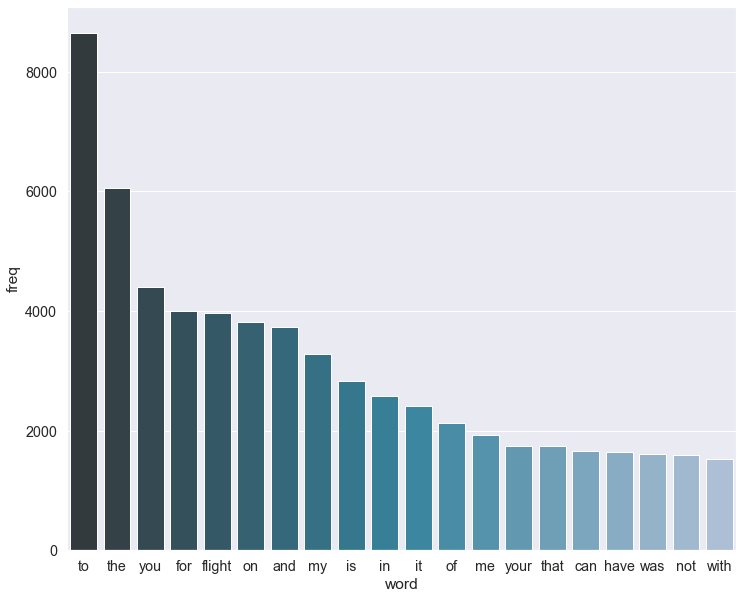

In [38]:
cv=CountVectorizer()
bow=cv.fit_transform(sr_clean)
word_freq=dict(zip(cv.get_feature_names(),np.asarray(bow.sum(axis=0)).ravel()))
word_counter=collections.Counter(word_freq)
word_counter_df=pd.DataFrame(word_counter.most_common(20),columns=['word','freq'])
fig,ax=plt.subplots(figsize=(12,10))
sns.barplot(x="word",y="freq",data=word_counter_df,palette="PuBuGn_d",ax=ax)
plt.show()

# 6.Grid search

In [39]:
def grid_vect(clf,parameters_clf,X_train,X_test,parameters_text=None,vect=None,is_w2v=False):
    textcountscols=['count_capital_words','count_emojis','count_excl_quest_marks','count_hashtags','count_mentions','count_urls','count_words']
    if is_w2v:
        w2vcols=[]
        for i in range(SIZE):
            w2vcols.append(i)
        features=FeatureUnion([('textcounts',ColumnExtractor(cols=textcountscols)),('w2v',ColumnExtractor(cols=w2vcols))],n_jobs=-1)
    else:
            features=FeatureUnion([('textCounts',ColumnExtractor(cols=textcountscols)),('pipe',Pipeline([('cleantext',ColumnExtractor(cols='clean_text')),('vect',vect)]))],n_jobs=-1)
    pipeline=Pipeline([('features',features),('clf',clf)])



    parameters=dict()
    if parameters_text:
        parameters.update(parameters_text)
    parameters.update(parameters_clf)
    grid_search=GridSearchCV(pipeline,parameters,n_jobs=-1,verbose=1,cv=5)
    print("Performing grid search...")
    print("pipeline:",[name for name,_ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0=time()
    grid_search.fit(X_train,y_train)
    print("done in %0.3fs" %(time()-t0))
    print()
    print("Best CV score:%0.3f"%grid_search.best_score_)
    print("Best parameters set:")
    best_parameters=grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" %(param_name,best_parameters[param_name]))
    print("Test score with best_estimator_: %0.3f" % grid_search.best_estimator_.score(X_test,y_test))
    print("\n")
    print("Classification Report Test Data")
    print(classification_report(y_test,grid_search.best_estimator_.predict(X_test)))

    return grid_search


# 7.Parameter Grid search for Vectorizers

In [40]:
parameters_vect={
    'features__pipe__vect__max_df':(0.25,0.5,0.75),
    'features__pipe__vect__ngram_range': ((1,1),(1,2)),
    'features__pipe__vect__min_df':(1,2)
}
parameters_mnb={
    'clf__alpha':(0.25,0.5,0.75)
}
parameters_logreg={
    'clf__C':(0.25,0.5,1.0),
    'clf__penalty':('l1','l2')
}

# 8.Column Extractor

In [41]:
class ColumnExtractor(TransformerMixin,BaseEstimator):
    def __init__(self,cols):
        self.cols=cols
    def transform(self,X, **transform_params):
        return X[self.cols]
    def fit(self,X,y=None,**fit_params):
        return self
    

# 9.Text Counts

In [42]:
class TextCounts(BaseEstimator,TransformerMixin):
    def count_regex(self,pattern,tweet):
        return len(re.findall(pattern,tweet))
    def fit(self,X,y=None,**fit_params):
        return self
    def transform(self,X,**transform_params):
        count_words=X.apply(lambda x: self.count_regex(r'\w+',x))
        count_mentions=X.apply(lambda x: self.count_regex(r'@\w+',x))
        count_hashtags=X.apply(lambda x:self.count_regex(r'#\w+',x))
        count_capital_words=X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b',x))
        count_excl_quest_marks=X.apply(lambda x: self.count_regex(r'!|\?',x))
        count_urls=X.apply(lambda x:self.count_regex(r'http.?://[^\s]+[\s]?',x))
        count_emojis=X.apply(lambda x: emoji.demojize(x)).apply(lambda x: self.count_regex(r':[a-z_&]+:',x))
        df=pd.DataFrame({'count_words': count_words
                        , 'count_mentions': count_mentions
                         , 'count_hashtags': count_hashtags
                         , 'count_capital_words': count_capital_words
                         , 'count_excl_quest_marks': count_excl_quest_marks
                         , 'count_urls': count_urls
                         ,'count_emojis': count_emojis
                        })
        return df
tc=TextCounts()
airlines_eda=tc.fit_transform(airlines_train.text)
airlines_eda['airline_sentiment']=airlines_train.airline_sentiment        

# 10.Count Vectorizer Classifiers 

In [43]:
df_model=airlines_eda
df_model['clean_text']=sr_clean
df_model.columns.tolist()
X_train,X_test,y_train,y_test=train_test_split(df_model.drop('airline_sentiment',axis=1),df_model.airline_sentiment,test_size=0.1,random_state=37)
mnb=MultinomialNB()
logreg=LogisticRegression()
countvect=CountVectorizer()
best_mnb_countvect=grid_vect(mnb,parameters_mnb,X_train,X_test,parameters_text=parameters_vect,vect=countvect)
best_logreg_countvect=grid_vect(logreg,parameters_logreg,X_train,X_test,parameters_text=parameters_vect,vect=countvect)


Performing grid search...
pipeline: ['features', 'clf']
parameters:
{'clf__alpha': (0.25, 0.5, 0.75),
 'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
 'features__pipe__vect__min_df': (1, 2),
 'features__pipe__vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   43.5s finished


done in 46.446s

Best CV score:0.793
Best parameters set:
	clf__alpha: 0.75
	features__pipe__vect__max_df: 0.25
	features__pipe__vect__min_df: 2
	features__pipe__vect__ngram_range: (1, 2)
Test score with best_estimator_: 0.799


Classification Report Test Data
              precision    recall  f1-score   support

    negative       0.84      0.91      0.88       940
     neutral       0.68      0.55      0.61       292
    positive       0.73      0.64      0.69       232

    accuracy                           0.80      1464
   macro avg       0.75      0.70      0.72      1464
weighted avg       0.79      0.80      0.79      1464

Performing grid search...
pipeline: ['features', 'clf']
parameters:
{'clf__C': (0.25, 0.5, 1.0),
 'clf__penalty': ('l1', 'l2'),
 'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
 'features__pipe__vect__min_df': (1, 2),
 'features__pipe__vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.9min finished


done in 245.141s

Best CV score:0.805
Best parameters set:
	clf__C: 0.25
	clf__penalty: 'l2'
	features__pipe__vect__max_df: 0.5
	features__pipe__vect__min_df: 1
	features__pipe__vect__ngram_range: (1, 2)
Test score with best_estimator_: 0.802


Classification Report Test Data
              precision    recall  f1-score   support

    negative       0.87      0.89      0.88       940
     neutral       0.62      0.65      0.64       292
    positive       0.74      0.63      0.68       232

    accuracy                           0.80      1464
   macro avg       0.74      0.72      0.73      1464
weighted avg       0.80      0.80      0.80      1464



# 11.TfIdfClassifiers

In [44]:
tfidfvect= TfidfVectorizer()
best_mnb_tfidf=grid_vect(mnb,parameters_mnb,X_train,X_test,parameters_text=parameters_vect,vect=tfidfvect)
best_logreg_tfidf=grid_vect(logreg,parameters_logreg,X_train,X_test,parameters_vect,vect=tfidfvect)

Performing grid search...
pipeline: ['features', 'clf']
parameters:
{'clf__alpha': (0.25, 0.5, 0.75),
 'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
 'features__pipe__vect__min_df': (1, 2),
 'features__pipe__vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   40.3s finished


done in 42.497s

Best CV score:0.747
Best parameters set:
	clf__alpha: 0.25
	features__pipe__vect__max_df: 0.5
	features__pipe__vect__min_df: 2
	features__pipe__vect__ngram_range: (1, 2)
Test score with best_estimator_: 0.765


Classification Report Test Data
              precision    recall  f1-score   support

    negative       0.76      0.98      0.86       940
     neutral       0.76      0.34      0.47       292
    positive       0.80      0.45      0.58       232

    accuracy                           0.77      1464
   macro avg       0.77      0.59      0.63      1464
weighted avg       0.77      0.77      0.73      1464

Performing grid search...
pipeline: ['features', 'clf']
parameters:
{'clf__C': (0.25, 0.5, 1.0),
 'clf__penalty': ('l1', 'l2'),
 'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
 'features__pipe__vect__min_df': (1, 2),
 'features__pipe__vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.8min finished


done in 228.841s

Best CV score:0.766
Best parameters set:
	clf__C: 1.0
	clf__penalty: 'l2'
	features__pipe__vect__max_df: 0.25
	features__pipe__vect__min_df: 2
	features__pipe__vect__ngram_range: (1, 1)
Test score with best_estimator_: 0.773


Classification Report Test Data
              precision    recall  f1-score   support

    negative       0.81      0.91      0.86       940
     neutral       0.61      0.51      0.56       292
    positive       0.74      0.53      0.62       232

    accuracy                           0.77      1464
   macro avg       0.72      0.65      0.68      1464
weighted avg       0.76      0.77      0.76      1464

